<a href="https://colab.research.google.com/github/mzums/kaggle/blob/main/salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
! pip install -q kaggle

In [49]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [50]:
! chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

salary-dataset-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [138]:
import zipfile

In [16]:
zip_ref = zipfile.ZipFile('/content/salary-dataset-simple-linear-regression.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [144]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [153]:
data = []

with open('Salary_dataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(float(row['YearsExperience']), float(row['Salary']))
        data.append([float(row['YearsExperience']), float(row['Salary'])])

1.2000000000000002 39344.0
1.4000000000000001 46206.0
1.6 37732.0
2.1 43526.0
2.3000000000000003 39892.0
3.0 56643.0
3.1 60151.0
3.3000000000000003 54446.0
3.3000000000000003 64446.0
3.8000000000000003 57190.0
4.0 63219.0
4.1 55795.0
4.1 56958.0
4.199999999999999 57082.0
4.6 61112.0
5.0 67939.0
5.199999999999999 66030.0
5.3999999999999995 83089.0
6.0 81364.0
6.1 93941.0
6.8999999999999995 91739.0
7.199999999999999 98274.0
8.0 101303.0
8.299999999999999 113813.0
8.799999999999999 109432.0
9.1 105583.0
9.6 116970.0
9.7 112636.0
10.4 122392.0
10.6 121873.0


In [141]:
X_train = [row[0] for row in data[:25]]
y_train = [row[1] for row in data[:25]]

X_test = [row[0] for row in data[25:]]
y_test = [row[1] for row in data[25:]]

In [142]:
print(y_test)

[105583.0, 116970.0, 112636.0, 122392.0, 121873.0]


In [155]:
np_array = np.array(data)

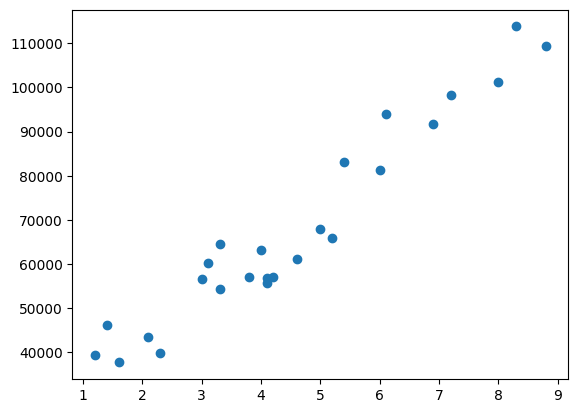

In [165]:
plt.plot(X_train, y_train, 'o')